# Part II: Observations from exploratory study

### By Cooper Nederhood

### (A) Initial code to load data

In [11]:
# Load libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('classic')

gss_location = "C:/Users/Cooper/Documents/Autumn 2017/Perspectives I/persp-analysis/assignments/exploratory-data-analysis/data"
gss_file = "gss2012.csv"
gss = pd.read_csv(gss_location + "/" + gss_file, index_col = "id")

income_order = [ 'UNDER $1 000', '$1 000 TO 2 999',  '$3 000 TO 3 999',
          '$4 000 TO 4 999',    '$5 000 TO 5 999', '$6 000 TO 6 999',  '$7 000 TO 7 999', '$8 000 TO 9 999',  '$10000 TO 12499', '$12500 TO 14999', '$15000 TO 17499', '$17500 TO 19999', '$20000 TO 22499', '$22500 TO 24999', '$25000 TO 29999','$30000 TO 34999', '$35000 TO 39999', '$40000 TO 49999',  '$50000 TO 59999',  '$60000 TO 74999',    
         '$75000 TO $89999', '$90000 TO $109999', '$110000 TO $129999',  '$130000 TO $149999', '$150000 OR OVER']

## (B) Non-participation in presidential elections

Broad participation in the electoral process is important for a fully-functioning democracy. For many citizens, casting a vote is the most engaged that individual will be with the political process. Despite the importance and the vast resources spent by partisan groups to encourage voting, a large segment of the population still does not vote. For example, the GSS data includes information on whether respondents voted in the 2008 Presidential Election and roughly 500 did not vote compared to 1,300 that did vote (see *'Fig 1: Voting & non-participating in 2008'* below). 

The wealth of information in the GSS allows us to investigate characteristics of this non-participating group to better understand this behavior. We see some evidence of a correlation between the likelihood of not voting and economic status, as represented by the income bracket. In fact, in each of the 13 income brackets below an annual income of 22,500 more individuals fail to vote at all than vote for Barack Obama, the victor of the election. John McCain, the losing candidate, does not garner more votes than the non-voting group until the 60,000 income bracket (see *'Fig 2: Presidential voting by income bracket'* below). These non-voters could substantively alter the political sphere should they chose to participate. One might think that low income individuals are less likely to vote either because they are constrained by a lack of resources or perhaps because they feel disconnected from the political process and thus lack the will to participate. Figure 2 suggests that the relative share of non-voters decreases as income levels increase, consistent with this initial hypothesis.

To learn more about the relationship between economic status and election participation we can look at the work status of respondents. Perhaps non-voters are more likely to be unemployed and searching for a job, which can prevent them from taking time away from a job search to go vote. Perhaps non-voters are more likely to be the sole provider for their family and they cannot take time away from work. In fact, there does not seem to be a substantial difference in the working status between those that voted and those that did *not* vote in 2008. The only noticeable exception is in the retired group: retirees **always** vote (see *'Fig 3: Vote or non-vote by working status'* below).

The GSS data also allows us to investigate demographics of the non-voters. Perhaps non-voters are disproportionately young people. One might think that young people are less organized, are voting for the first time or for a host of other reasons may be less likely to vote. We can look at a box plot of the age of respondents broken out by whether or not they voted in the 2008 election. Here, we have also explicitly classified those with a 'missing' value for their 2008 voting status. As hypothesized, the 25th, 50th, and 75th percentiles of age for respondents who did not vote are all noticeably lower than the corresponding percentiles for those that did vote. However, the 25th percentile of the non-voters is still 30 years old, so the non-voters are still comprised mostly of adults with many years of past voting eligability. Also worth noting is that the "MISSING" population, those for which a 2008 voting classification is unknown have a much younger distribution than both the voted and non-voted subpopulations. Perhaps the voting classification is not missing at random. The missing-ness will have to be addressed in further research (see *'Fig 4: Boxplot of age by 2008 voting'* below).

Finally, we can begin to ask the question "Who would the non-voters vote for if they voted?" A first step to address this is to examine the political leanings of the non-voters. Future research would need to address whether or not the self-reported political interests of individuals who do not actually participate in elections is reliable, but for now we will accept the validity of the data. A stacked bar chart of political interests by 2008 voting status has an interesting result: voters are less likely to self-identify as moderates than non-voters (see *'Fig 5: Political views normalized by 2008 voting'* below). This could be explained a variety of ways. Perhaps having polarized views leads to a greater interest in political outcomes and thus an increased likelihood of voting. Conversely, perhaps repated engagement in the political process leads to polarization. Finally, perhaps candidates are increasingly partisan, thus garnering strong support in their partisan base while alienating moderates. Regardless, in the current age of politics I think this is an interesting question that warrants additional study. The present analysis relied on self-reported political idiology, but future analysis could rely instead on the individual survey questions regarding attitudes on social and economic issues to obtain a more fine grained conceptualization of political ideology. Such an approach, free of political terminology and baggage, may be a truer representation of individual's preferences.

### Appendix for charts referenced above

Text(0.5,1,'Fig 1: Voting & non-participation in 2008')

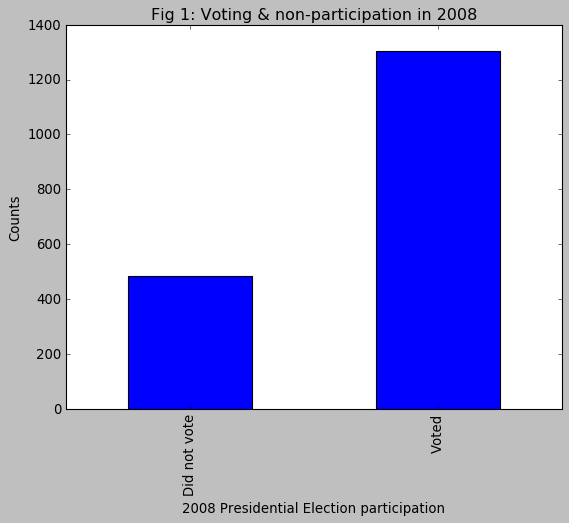

In [28]:
gss.groupby('voted08').size().plot.bar()
plt.xlabel('2008 Presidential Election participation')
plt.ylabel('Counts')
plt.title('Fig 1: Voting & non-participation in 2008')

Text(0.5,1,'Fig 2: 2008 Presidential voting by income bracket')

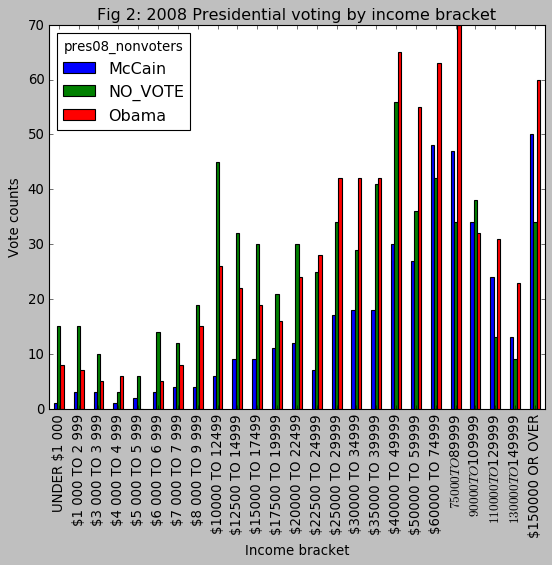

In [29]:
gss['pres08_nonvoters'] = gss.pres08.fillna('NO_VOTE')
gb = gss.groupby(['income06', 'pres08_nonvoters']).size().unstack()
gb.loc[income_order].plot.bar()
plt.xlabel('Income bracket')
plt.ylabel('Vote counts')
plt.title('Fig 2: 2008 Presidential voting by income bracket')

Text(0,0.5,'Respondent counts')

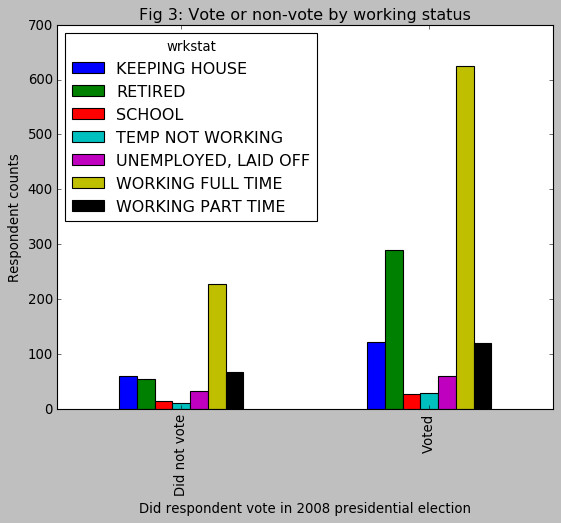

In [30]:
gb_ws = gss.groupby(['voted08', 'wrkstat']).size().unstack().plot.bar()
plt.title('Fig 3: Vote or non-vote by working status')
plt.xlabel('Did respondent vote in 2008 presidential election')
plt.ylabel('Respondent counts')

C:\Users\Cooper\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'Age')

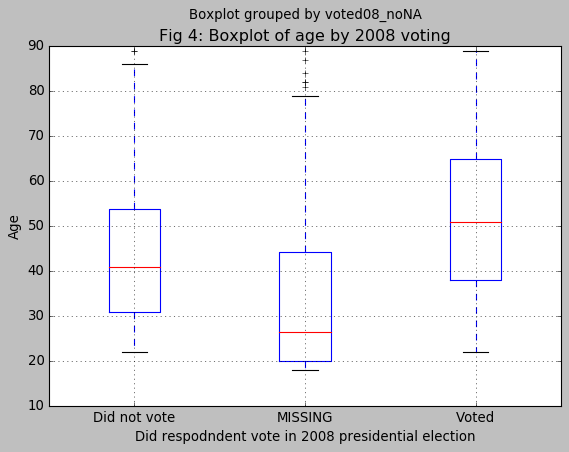

In [31]:
gss['voted08_noNA'] = gss.voted08.fillna('MISSING')
gb = gss.groupby(['age','voted08_noNA']).size()
gb_unstack = gb.unstack()
gss.boxplot(column='age', by='voted08_noNA')
plt.title('Fig 4: Boxplot of age by 2008 voting')
plt.xlabel('Did respodndent vote in 2008 presidential election')
plt.ylabel('Age')

Text(0,0.5,'Normalized counts')

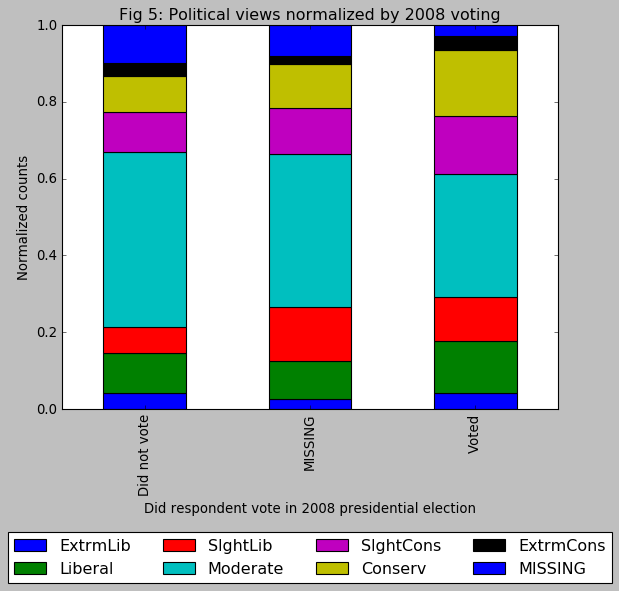

In [32]:
gss['polviews_noNA'] = gss.polviews.fillna('MISSING')
gb = gss.groupby([ 'voted08_noNA', 'polviews_noNA']).size()/gss.groupby([ 'voted08_noNA']).size()
gb_unstack = gb.unstack()
gb_unstack[['ExtrmLib', 'Liberal', 'SlghtLib', 'Moderate', 'SlghtCons', 'Conserv', 'ExtrmCons', 'MISSING']].plot.bar(stacked=True)
plt.legend(loc=9, bbox_to_anchor=(.5, -0.3), ncol=4)
plt.title('Fig 5: Political views normalized by 2008 voting')
plt.xlabel('Did respondent vote in 2008 presidential election')
plt.ylabel('Normalized counts')